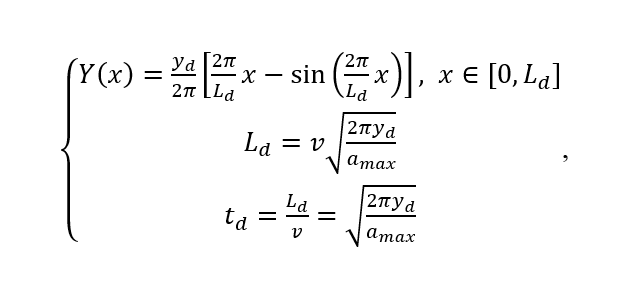

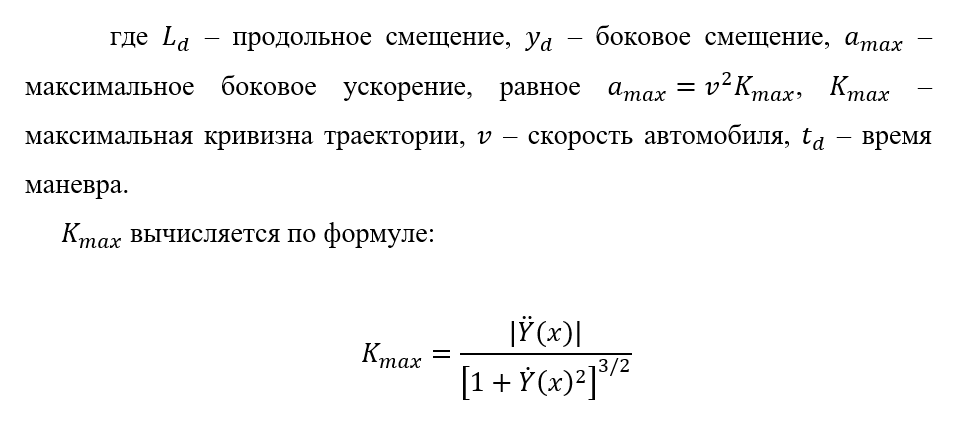

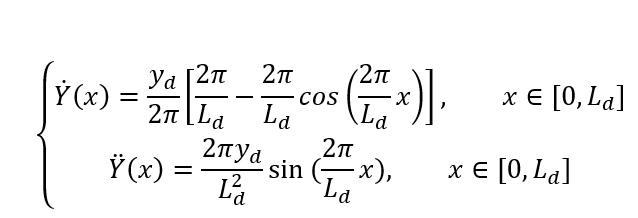

In [1]:
import math
import time
import copy
import scipy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from skimage.draw import line

In [3]:
v = 1
yd = 0.4
Ld = 1
def path_planer(v, yd=3.75, Ld=30):
    # Ld = v * math.sqrt((2 * math.pi * yd) / a_max)
    x = np.arange(0, Ld, 0.1)
    Y = yd/(2*math.pi) * (2*math.pi*x/Ld - np.sin(2*math.pi*x/Ld))
    # Y1 = (0.5 * yd / math.pi) * (2*math.pi/Ld - (2*math.pi/Ld)*math.cos(2*math.pi*x/Ld))
    # Y2 = (2*math.pi*yd/Ld ** 2) * math.sin(2*math.pi*x/Ld)
    td = Ld / v
    # K_max = abs(Y2)/pow((1 + Y1 ** 2), 3/2)
    # a_max = K_max * v ** 2
    return x, Y, td

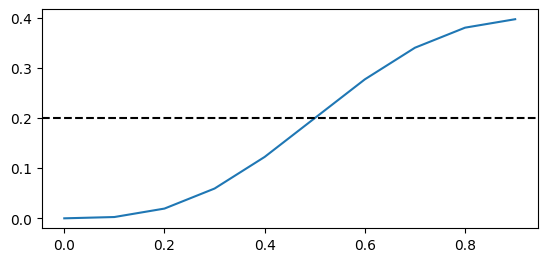

In [4]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
x, Y, t = path_planer(v, yd, Ld)
plt.plot(x, Y)
plt.axhline(yd/2, color='black', linestyle='--')

In [5]:
t

1.0

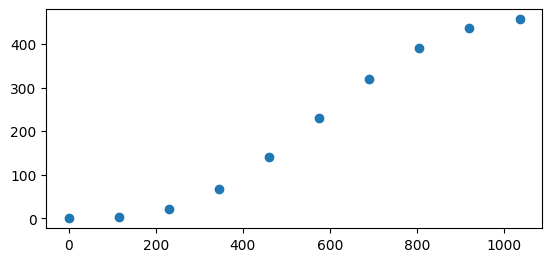

In [33]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.scatter(x*1150,Y*1150)

In [7]:
def angle_to_control(angle_degrees):
    '''convert angle (deg) to control signal ([-1;1])'''
    max_angle_degrees = 65
    control_signal = angle_degrees / max_angle_degrees
    return control_signal

In [8]:
def get_point_angle(x, y):
    '''calculate angle b/w vector (x,y) and horizontal line'''
    angle_rad = np.arctan2(y, x)
    angle_deg = np.degrees(angle_rad)
    # if angle_deg < 0:
    #     angle_deg += 360
    return angle_deg


In [9]:
def get_path_angles(x, y):
    '''calculate angles along path'''
    angles = []
    for i in range(1, len(x)):
        angles.append(get_point_angle(x[i] - x[i-1], y[i] - y[i-1]))
    return angles

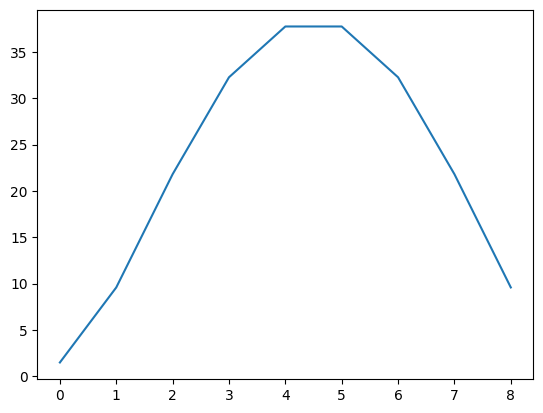

In [10]:
plt.plot(get_path_angles(x, Y))

In [11]:
dt = t/len(x)
dt

0.1

In [ ]:
def maneuver():
    '''implementation of lane changing'''
    v = 2
    yd = 3.75
    Ld = 30
    X, Y, t = path_planer(v, yd, Ld)
    angles = get_path_angles(X, Y)
    dt = t / len(X)
    for i in range(len(X)):
        steer(car, angles[i])
        time.sleep(dt)

def steer(car, angle):
    car.steering(angle_to_control(angle))
    

In [68]:
def check_obstacle_static(obstacle_map, angles, v, dt):
    '''angles must be in rad'''
    angles = np.deg2rad(angles)
    current_pos = [1000, 2000 // 2]
    l = v * dt * 1150.0 # vector length
    path = copy.copy(obstacle_map)
    for i in range(len(angles)):
        next_pos = [int(current_pos[0] - l * math.cos(angles[i])), int(current_pos[1] + l * math.sin(angles[i]))]
        rr, cc = line(*current_pos, *next_pos)
        current_pos = next_pos
        path[rr, cc] = 255

    return path

In [69]:
obst_map = np.zeros((1001, 2001))
angles = get_path_angles(x, Y)
path = check_obstacle_static(obst_map, angles, v, dt)

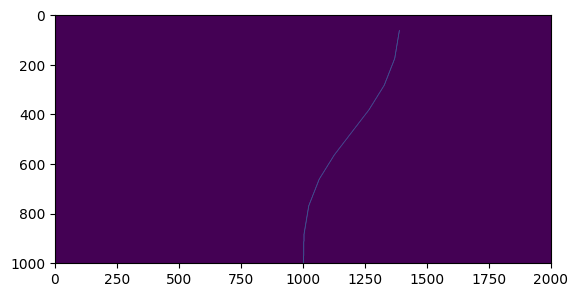

In [70]:
imshow(path)

In [14]:
def get_dist(p1, p2):
    return np.linalg.norm(
        np.array(p1) - np.array(p2)
    )

In [44]:
def check_obstacle_static(obstacle_map, angles, x, y):
    '''angles must be in rad'''
    angles = np.deg2rad(angles)
    current_pos = [obstacle_map.shape[0] - 1, obstacle_map.shape[1] // 2 - 1]
    y = current_pos[1] + y * 1150.0
    x = current_pos[0] - x * 1150.0

    path = copy.copy(obstacle_map)
    for i in range(len(angles)):
        l = get_dist([current_pos[0], current_pos[1]], [x[i], y[i]])
        next_pos = [int(current_pos[0] - l * math.cos(angles[i])), int(current_pos[1] + l * math.sin(angles[i]))]
        rr, cc = line(*current_pos, *next_pos)
        current_pos = next_pos
        path[rr, cc] = 255

    return path

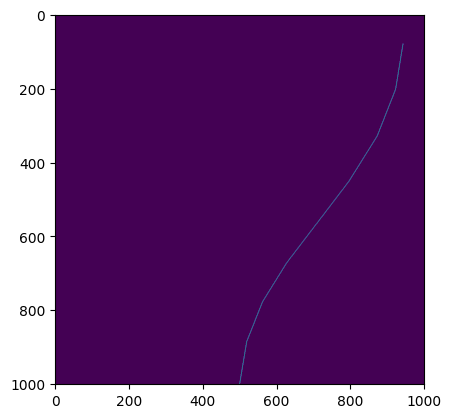

In [45]:
obst_map = np.zeros((1001, 1001))
angles = get_path_angles(x, Y)
x, y, _ = path_planer(v, yd, Ld)
path = check_obstacle_static(obst_map, angles, x, y)
imshow(path)